In [1]:
!pip install torch diffusers matplotlib transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import torch

In [3]:
x=torch.tensor([1.0,2.0,3.0])
y=torch.ones(3)
z=x+y
print(z)

tensor([2., 3., 4.])


In [4]:
print(x.shape,x.size(),x.dtype)

torch.Size([3]) torch.Size([3]) torch.float32


In [5]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
x=x.to(device)

In [6]:
x=torch.tensor(3.0,requires_grad=True)
y=x**2
y.backward()
print(x.grad)

tensor(6.)


In [7]:
import torch.nn as nn
class SimpleModel(nn.Module):
  def __init__(self) -> None:
    super(SimpleModel,self).__init__()
    self.linear=nn.Linear(2,1)
  def forward(self,x):
    return self.linear(x)

In [8]:
model= SimpleModel()
criteron= nn.MSELoss()
optimizer =torch.optim.SGD(model.parameters(),lr=0.01)

In [9]:
for epoch in range(10):
  optimizer.zero_grad()
  output=model(torch.tensor([[1.0,2.0]]))
  loss=criteron(output,torch.tensor([[1.0]]))
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.017431875690817833
Epoch 1, Loss: 0.013499246910214424
Epoch 2, Loss: 0.010453827679157257
Epoch 3, Loss: 0.008095435798168182
Epoch 4, Loss: 0.006269104778766632
Epoch 5, Loss: 0.004854792263358831
Epoch 6, Loss: 0.0037595510948449373
Epoch 7, Loss: 0.00291139492765069
Epoch 8, Loss: 0.002254592487588525
Epoch 9, Loss: 0.001745951478369534


In [10]:
from torch.utils.data import DataLoader,TensorDataset
data=torch.tensor([[1.0,2.0],[3.0,4.0]])
targets=torch.tensor([[1.0],[0.0]])
dataset=TensorDataset(data,targets)
loader=DataLoader(dataset,batch_size=1,shuffle=True)
for batch in loader:
  print(batch)

[tensor([[1., 2.]]), tensor([[1.]])]
[tensor([[3., 4.]]), tensor([[0.]])]


In [11]:
scripted_model=torch.jit.script(model)
print(scripted_model)
scripted_model.save("scripted_model.pt")
loaded_model=torch.jit.load("scripted_model.pt")
print(loaded_model)

RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)
RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)


In [12]:
pip install matplotlib

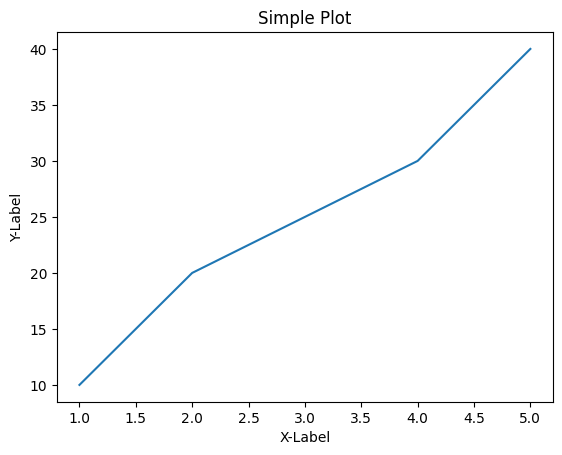

In [13]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[10,20,25,30,40]
plt.plot(x,y)
plt.title("Simple Plot")
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
plt.show()

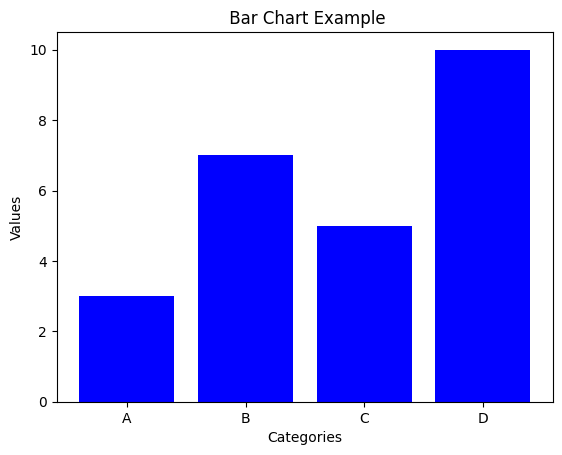

In [14]:
categories=['A','B','C','D']
values=[3,7,5,10]
plt.bar(categories,values,color="blue")
plt.title(" Bar Chart Example")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()

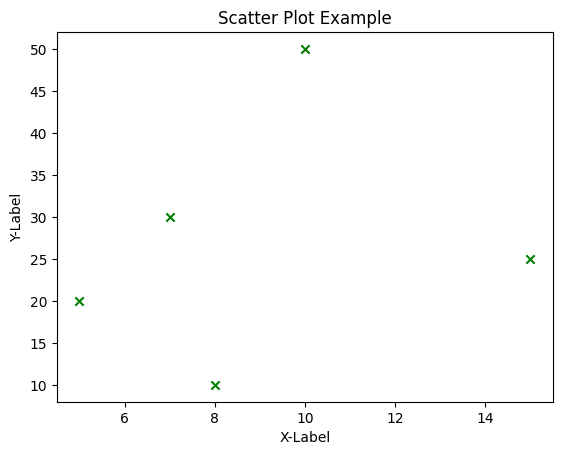

In [15]:
x=[5,7,8,10,15]
y=[20,30,10,50,25]
plt.scatter(x,y,color="green",marker='x')
plt.title("Scatter Plot Example")
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
plt.show()

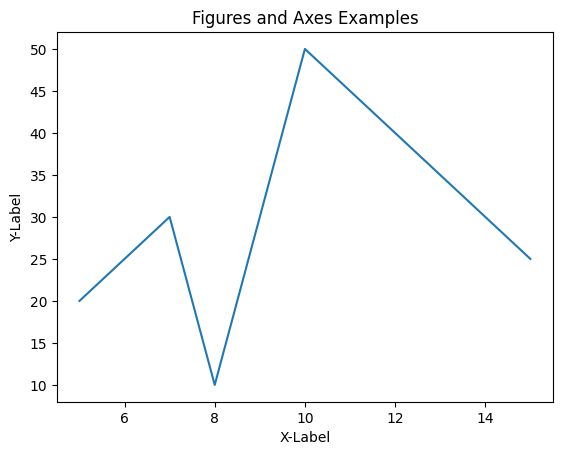

In [16]:
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set_title("Figures and Axes Examples")
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
plt.show()


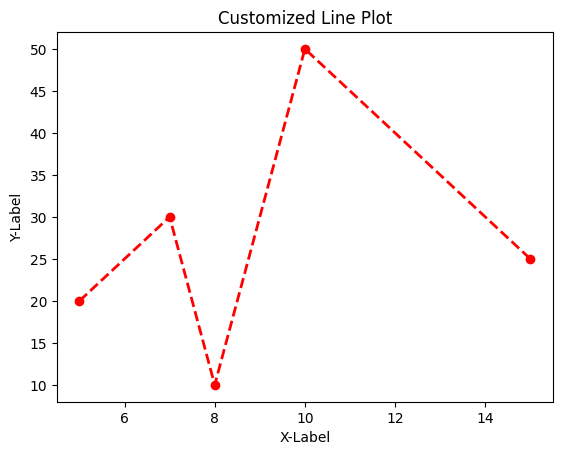

In [17]:
plt.plot(x,y,color="red",linestyle="--",marker="o",linewidth=2)
plt.title("Customized Line Plot")
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
plt.show()

In [18]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [19]:

authorization_token = ""
modelid = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [20]:
device = "cpu"
pipe = StableDiffusionPipeline.from_pretrained(modelid, revision="fp16", torch_dtype=torch.float16, use_auth_token=authorization_token)
pipe.to(device) # pipe will be loaded on cpu

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': ''} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis-

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Keyword arguments {'use_auth_token': ''} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Enter your prompt: sunset


  0%|          | 0/50 [00:00<?, ?it/s]

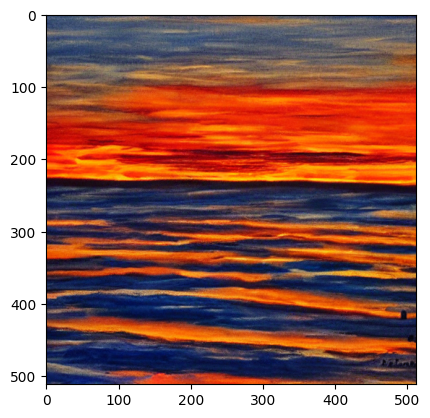

In [22]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# ... (rest of the code) ...

device = "cpu"
# Load the pipeline with torch_dtype=torch.float32
pipe = StableDiffusionPipeline.from_pretrained(
    modelid, revision="fp16", torch_dtype=torch.float32, use_auth_token=authorization_token
)
pipe.to(device)  # pipe will be loaded on cpu


# Remove autocast as it is not needed on CPU and can cause dtype issues
# with autocast(device):
textprompt = str(input("Enter your prompt: "))

image = pipe(textprompt, guidance_scale=8.5).images[0]

imgplot = plt.imshow(image)